## MACHINE LEARNING & VISUALIZATION

Effectiveness of Public Assistance on Financial Well-Being

In [10]:
import pandas as pd

df = pd.read_csv("final_dataset.csv", encoding="utf-8-sig")
df.head()

,IRIS,DISP_TP6018,DISP_Q118,DISP_MED18,DISP_Q318,DISP_EQ18,DISP_D118,DISP_D218,DISP_D318,DISP_D418,...,DISP_PPLOGT18,DISP_PIMPOT18,DISP_NOTE18,Nom_IRIS,revenu_apres_aides,part_aides_totales,revenu_avant_aides,ratio_pauvrete,indice_dependance_aides,gain_relatif_aides
0,010040101,20.1,14000.0,19300.0,25250.0,0.58,10340.0,13010.0,14970.0,17020.0,...,2.0,-15.1,0.0,Les Perouses-Triangle d'ActivitÃ©,19300.0,17.6,15903.20,0.940644,17.6,0.213592
1,010040102,25.7,12890.0,17530.0,23100.0,0.58,9970.0,12030.0,13710.0,15570.0,...,3.1,-13.8,0.0,Longeray-Gare,17530.0,23.0,13498.10,1.202714,23.0,0.298701
2,010040201,19.1,14090.0,19580.0,26320.0,0.62,11000.0,13140.0,15170.0,17640.0,...,2.1,-15.8,0.0,Centre-Saint-Germain-Vareilles,19580.0,15.6,16525.52,0.893846,15.6,0.184834
3,010040202,8.9,18360.0,24530.0,31590.0,0.54,13600.0,17120.0,19550.0,21970.0,...,0.8,-20.3,0.0,Tiret-Les Allymes,24530.0,8.2,22518.54,0.416504,8.2,0.089325
4,010330102,18.6,14060.0,19960.0,28100.0,0.70,10230.0,13330.0,15420.0,17470.0,...,1.6,-14.7,0.0,Centre Ville,19960.0,10.4,17884.16,0.870447,10.4,0.116071


We choose the poverty rate as the target variable because it is the main indicator of economic well-being.
The primary objective of public assistance policies is precisely to reduce poverty.
This makes the poverty rate the most relevant outcome variable for evaluating policy effectiveness.

In [17]:
target = "DISP_TP6018"
# We remove rows where poverty rate is missing.
df = df.dropna(subset=[target])

In [18]:
drop_cols = ["IRIS", "Nom_IRIS", "ratio_pauvrete"]

X = df.drop(columns=drop_cols + [target])
y = df[target]

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Preprocessing pipeline

In [20]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


num_features = X.select_dtypes(include=[np.number]).columns
preprocessor = ColumnTransformer(
    transformers=[("num", Pipeline(steps=[ ("imputer", SimpleImputer(strategy="median")),("scaler", StandardScaler())]), num_features)])

Random Forest

In [22]:
from sklearn.ensemble import RandomForestRegressor
#training
rf = RandomForestRegressor( n_estimators=300, random_state=42, n_jobs=-1)
rf_pipeline = Pipeline(steps=[ ("prep", preprocessor),("model", rf)])
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['DISP_Q118', 'DISP_MED18', 'DISP_Q318', 'DISP_EQ18', 'DISP_D118',
       'DISP_D218', 'DISP_D318', 'DISP_D418', 'DISP_D618', 'DISP_D718',
       'DISP_D818', 'DISP_D918', 'DISP_RD18', 'DISP_S80S2018', 'DISP_GI18',
       'DIS...PCHO18', 'DISP_PBEN18',
       'DISP_PPEN18', 'DISP_PPAT18', 'DISP_PPSOC18', 'DISP_PPFAM18',
       'DISP_PPMINI18', 'DISP_PPLOGT18', 'DISP_PIMPOT18', 'DISP_NOTE18',
       'revenu_apres_aides', 'part_aides_totales', 'revenu_avant_aides',
       'indice_dependance_aides', 'gain_relatif_aides'],
      dtype='object'))])),
                ('model',
                 RandomForestRegressor(n_estimators=300, n_jobs=-1,
                                       random_state=42))])

In [24]:
#evaluate
from sklearn.metrics import mean_squared_error, r2_score

y_pred_rf = rf_pipeline.predict(X_test)

rmse_rf = (mean_squared_error(y_test, y_pred_rf))**0.5
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Performance")
print("RMSE:", round(rmse_rf, 3))
print("R² :", round(r2_rf, 3))


Random Forest Performance
RMSE: 4.07
R² : 0.845


The Random Forest model achieves an RMSE of about 4 on the poverty rate and an R² close to 0.85, meaning that around 85% of the variability in local poverty rates can be explained by the socio-economic features and assistance-related variables.

Feature importance from Random Forest

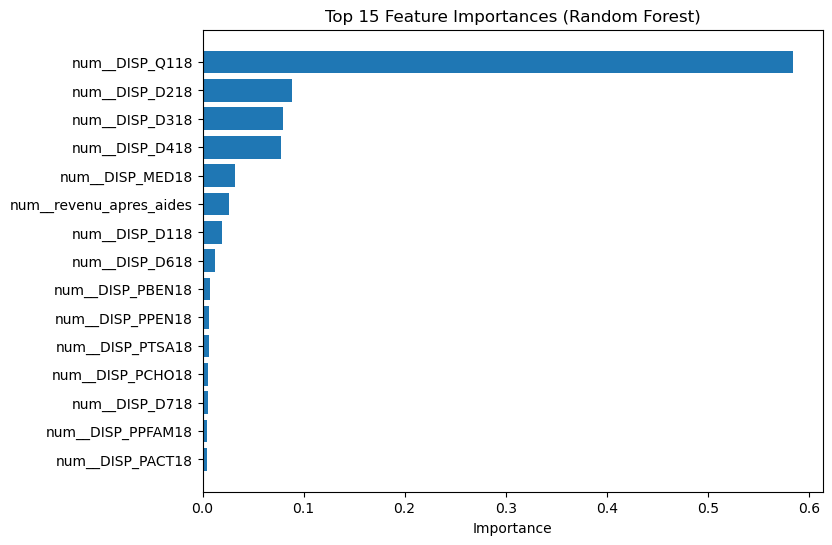

,Feature,Importance
0,num__DISP_Q118,0.584385
5,num__DISP_D218,0.088496
6,num__DISP_D318,0.079525
7,num__DISP_D418,0.077375
1,num__DISP_MED18,0.032332
27,num__revenu_apres_aides,0.026168
4,num__DISP_D118,0.018749
8,num__DISP_D618,0.012696
18,num__DISP_PBEN18,0.007040
19,num__DISP_PPEN18,0.006155


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

feature_names = rf_pipeline.named_steps["prep"].get_feature_names_out()

importances = rf_pipeline.named_steps["model"].feature_importances_

feat_imp = pd.DataFrame({"Feature": feature_names,"Importance": importances}).sort_values("Importance", ascending=False)

# Keep top 15
top15 = feat_imp.head(15)

# Plot
plt.figure(figsize=(8,6))
plt.barh(top15["Feature"], top15["Importance"])
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.show()

top15


The Random Forest model shows that poverty is mainly explained by income distribution at the lowest levels. The most important variable is the first income quartile (DISP_Q118), meaning that very low incomes are the strongest determinant of poverty differences across territories

Second model: Gradient Boosting Regression

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Identify feature types
numeric_features = X.select_dtypes(include=[np.number]).columns
categorical_features = X.select_dtypes(exclude=[np.number]).columns

# Numerical pipeline
numeric_transformer = Pipeline(steps=[ ("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())])

# Categorical pipeline
categorical_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="most_frequent")), ("onehot", OneHotEncoder(handle_unknown="ignore"))])

# Preprocessing block
preprocess = ColumnTransformer( transformers=[ ("num", numeric_transformer, numeric_features), ("cat", categorical_transformer, categorical_features) ])


In [30]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# Define the Gradient Boosting model
gbr = GradientBoostingRegressor(random_state=42)

# Full pipeline: preprocessing + model
gbr_pipeline = Pipeline(steps=[("prep", preprocess),("model", gbr)])

# Train the model
gbr_pipeline.fit(X_train, y_train)

# Predict on test set
y_pred_gbr = gbr_pipeline.predict(X_test)

# Evaluate performance
rmse_gbr = mean_squared_error(y_test, y_pred_gbr) ** 0.5
r2_gbr = r2_score(y_test, y_pred_gbr)

print("Gradient Boosting Performance")
print("RMSE:", round(rmse_gbr, 3))
print("R²:", round(r2_gbr, 3))


Gradient Boosting Performance
RMSE: 3.982
R²: 0.851


The model achieves strong predictive performance, with a Root Mean Squared Error (RMSE) of 3.98 and an R² of 0.851 on the test set. This means that the model explains over 85% of the variability in poverty rates across IRIS areas, while maintaining a relatively low average prediction error.

In [36]:
import pandas as pd

rmse_rf = 4.07
r2_rf = 0.845

rmse_gbr = 3.982
r2_gbr = 0.851

# Comparison table
comparison = pd.DataFrame({"Model": ["Random Forest", "Gradient Boosting"],"RMSE": [rmse_rf, rmse_gbr],"R²": [r2_rf, r2_gbr]})
comparison


,Model,RMSE,R²
0,Random Forest,4.070,0.845
1,Gradient Boosting,3.982,0.851


Since Gradient Boosting achieves a lower RMSE and a higher R² than Random Forest, it is selected as the final predictive model. It provides better accuracy in predicting poverty rates across IRIS areas

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

feature_names = gbr_pipeline.named_steps["prep"].get_feature_names_out()

importances = gbr_pipeline.named_steps["model"].feature_importances_

feat_imp = pd.DataFrame({ "Feature": feature_names, "Importance": importances}).sort_values("Importance", ascending=False)

#Keep top 15 variables
top15 = feat_imp.head(15)
top15


,Feature,Importance
0,num__DISP_Q118,0.403230
6,num__DISP_D318,0.315857
5,num__DISP_D218,0.102223
7,num__DISP_D418,0.062031
1,num__DISP_MED18,0.032651
4,num__DISP_D118,0.024231
8,num__DISP_D618,0.017647
27,num__revenu_apres_aides,0.015852
9,num__DISP_D718,0.005126
22,num__DISP_PPFAM18,0.003146


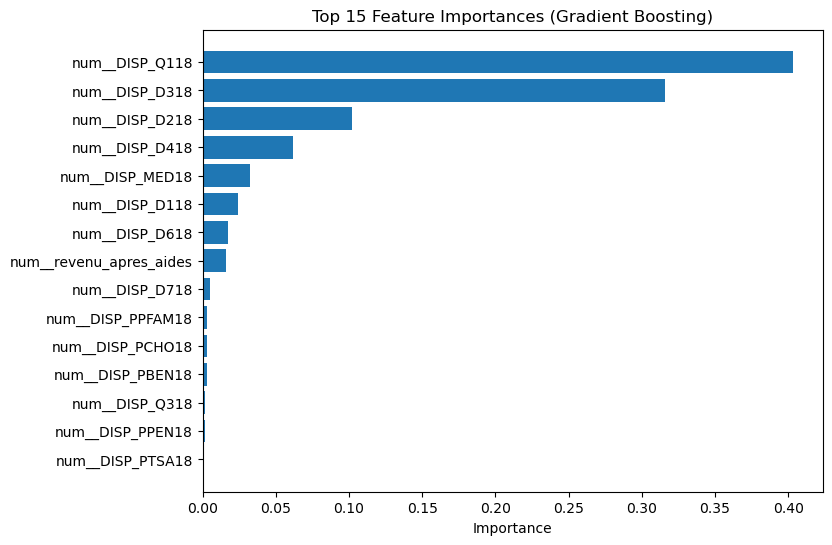

In [38]:
plt.figure(figsize=(8,6))
plt.barh(top15["Feature"], top15["Importance"])
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances (Gradient Boosting)")
plt.xlabel("Importance")
plt.show()
#plot

Prediction vs Observed poverty (visual validation)

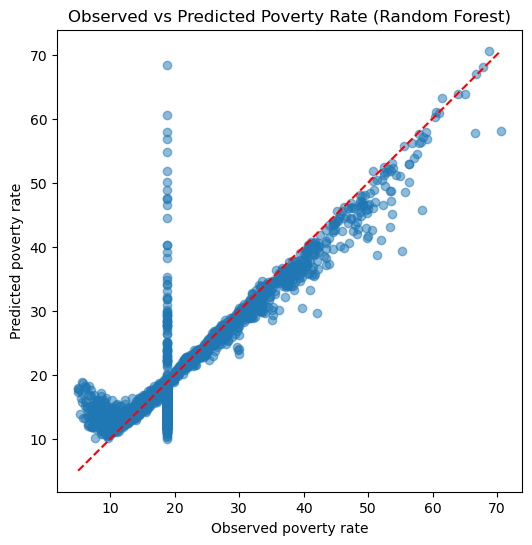

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.title("Observed vs Predicted Poverty Rate (Random Forest)")
plt.xlabel("Observed poverty rate")
plt.ylabel("Predicted poverty rate")
plt.show()


Partial dependence (effect of aid on poverty)

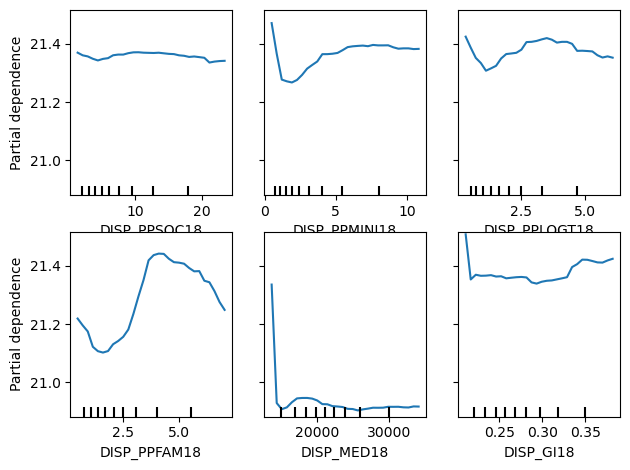

In [43]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

features_of_interest = [
    "DISP_PPSOC18",   # social benefits
    "DISP_PPMINI18",  # minimum income
    "DISP_PPLOGT18",  # housing aid
    "DISP_PPFAM18",   # family benefits
    "DISP_MED18",     # median income
    "DISP_GI18"       # inequality
]

PartialDependenceDisplay.from_estimator(rf_pipeline, X_train, features_of_interest, grid_resolution=30)

plt.tight_layout()
plt.show()


Partial dependence plots were computed for a limited set of economically meaningful variables rather than for all features. We focused on assistance-related indicators (social benefits, minimum income, housing aid, family benefits) and two key structural variables (median income and inequality). This allows interpretation of the marginal relationship between public assistance and poverty while avoiding unnecessary complexity.

BONUS :
In addition to tree-based models, we estimate a regularized linear model using Elastic Net regression. This model combines L1 and L2 regularization and is commonly used in econometrics to handle multicollinearity and variable selection

In [46]:
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

numeric_features = X.select_dtypes(include=[np.number]).columns

preprocess_elastic = ColumnTransformer(transformers=[("num", Pipeline([ ("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]), numeric_features)])

# Elastic Net model
enet = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)

enet_pipeline = Pipeline(steps=[ ("prep", preprocess_elastic), ("model", enet)])

# Train
enet_pipeline.fit(X_train, y_train)

# Predict
y_pred_enet = enet_pipeline.predict(X_test)

# Evaluate
rmse_enet = mean_squared_error(y_test, y_pred_enet) ** 0.5
r2_enet = r2_score(y_test, y_pred_enet)

print("Elastic Net Performance")
print("RMSE:", round(rmse_enet, 3))
print("R² :", round(r2_enet, 3))


Elastic Net Performance
RMSE: 5.095
R² : 0.756


Elastic Net performs significantly worse than Random Forest and Gradient Boosting, with a higher prediction error and a lower explained variance. This confirms that the relationship between public assistance, income structure and poverty is highly non-linear and involves complex interactions that cannot be captured by linear models. Tree-based machine learning methods are therefore more appropriate tools for modeling socio-economic inequality dynamics at the local level